**Aishwarya Singh, Nosson Weissman**

**DAV 6150 - Data Science**

**Professor James Topor**

**Summer 2022**

__DAV 6150 Practical Challenge 2 (Module 4) : Feature Engineering__

# Introduction

In this notebook, we explore a dataset and go thorugh an individualized overview of the dataset features.

Upon completion of data exploration and analysis, we prepare the data for and compute a PCA model to predict # shares for articles.

Steps involved in data preperation for PCA include:
- Removal of non-numeric features
- Removal of highly correlated features
- Removal of features with low variance (explained in the notebook)
- Data standardization
- And more

The [dataset](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)  in this notebook was originally built with the intention of predicting article popularity.

It's worth noting that the **authors of the paper** from which this dataset originated [**did not achieve a high accuracy on their model**](https://repositorium.sdum.uminho.pt/bitstream/1822/39169/1/main.pdf). This exercise is just an excercise. Given the data we have, it would be very hard (probably impossible) to predict the actual number of shares. That being said, for that lack of another way to measure our results, we will be comparing to their (the authors') target. While in this case, comparing to these results may not give us much information, this would be the same process we would use in a case where we do have the actual results which can compare to. 

## Load Data Set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 14, "display.max_columns", None)

We begin by loading the data from github into pandas and conducting a preliminary inspection.

In [4]:
filepath = 'https://raw.githubusercontent.com/everyzig/DAV-6150/main/M4_Data.csv'
raw_data = pd.read_csv(filepath)
raw_data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,

Check data types:

In [5]:
dict(raw_data.dtypes)

{'url': dtype('O'),
 ' timedelta': dtype('float64'),
 ' n_tokens_title': dtype('float64'),
 ' n_tokens_content': dtype('float64'),
 ' n_unique_tokens': dtype('float64'),
 ' n_non_stop_words': dtype('float64'),
 ' n_non_stop_unique_tokens': dtype('float64'),
 ' num_hrefs': dtype('float64'),
 ' num_self_hrefs': dtype('float64'),
 ' num_imgs': dtype('float64'),
 ' num_videos': dtype('float64'),
 ' average_token_length': dtype('float64'),
 ' num_keywords': dtype('float64'),
 ' data_channel_is_lifestyle': dtype('float64'),
 ' data_channel_is_entertainment': dtype('float64'),
 ' data_channel_is_bus': dtype('float64'),
 ' data_channel_is_socmed': dtype('float64'),
 ' data_channel_is_tech': dtype('float64'),
 ' data_channel_is_world': dtype('float64'),
 ' kw_min_min': dtype('float64'),
 ' kw_max_min': dtype('float64'),
 ' kw_avg_min': dtype('float64'),
 ' kw_min_max': dtype('float64'),
 ' kw_max_max': dtype('float64'),
 ' kw_avg_max': dtype('float64'),
 ' kw_min_avg': dtype('float64'),
 ' kw_m

### Check for any missing values
There are many attributes, so instead printing out number of missing vals for each attributes, we can tell if any attributes are missing data by turning the list into a set. If there are any missing values, the set will contain something other than 0 (we can also check if length is greater than 1 as option)

In [6]:
set(val for val in raw_data.isna().sum())

{0}

The data set appears to be clean, with no erroneous data typing and no missing values.

# Exploratory Data Analysis

#### Attribute Information:
<pre>
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)
</pre>

#### Types of Variables:
<pre>
0 - 1. Non-predictive metadata attributes.
2 - 12. Numeric variables regarding discrete counts or continuous rates of various content composition metrics.
13 - 18. Dummy variables for categorical attribute Data Channel.
19 - 30. Numeric variables regarding shares as related to other properties (mainly keywords).
31 - 38. Dummy variables for day of week on which the article was published.
39 - 43. Distribution dummy variables for LDA topic categories.
44 - 59. Numeric variables for sentiment metrics.
60. Numeric integer response variable.
</pre>

In [9]:
meta = list(raw_data.columns)[0:2]
numerics_content = list(raw_data.columns)[2:13]
data_channel = list(raw_data.columns)[13:19]
numerics_keywords = list(raw_data.columns)[19:31]
day_of_publish = list(raw_data.columns)[31:39]
LDA_proximity = list(raw_data.columns)[39:44]
numerics_sentiment = list(raw_data.columns)[44:60]
target = list(raw_data.columns)[60]

#### Overview Statistics

In [10]:
raw_data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

We note some very radical outlying max values in a lot of variables, when compared to the means and standard deviations of those variables.

Helper functions for EDA:

In [75]:
def eda_plot(df, col):
    '''Generate histogram and box plot for a given numeric attribute.'''
    plt.figure(figsize = (10,4))
    
    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col.strip())
    sns.histplot(x = df[col], kde = True, binwidth = df[col].std()/10)
    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col.strip())
    sns.boxenplot(x = df[col])
    
    plt.tight_layout()
    plt.show()

def eda_cat_plot(df, col, x_tick_deg = 90):
    '''Generate count plot for a given categorical attribute.'''
    plt.figure(figsize = (6,4))
    
    plt.title('Count of ' + col.strip())
    sns.countplot(x = col, data = df)
    plt.xticks(rotation = x_tick_deg)
    
    plt.tight_layout()
    plt.show()

def eda_modify(df_old, df_new, col):
    '''Compare before-and-after histograms and box plots for a modified numeric attribute.'''
    plt.figure(figsize = (6,4))
    
    plt.subplot(2,2,1)
    plt.title('Old: ' + col)
    sns.histplot(x = df_old[col], kde = True)
    plt.subplot(2,2,2)
    sns.boxenplot(x = df_old[col])
    
    plt.subplot(2,2,3)
    plt.title('New: ' + col)
    sns.histplot(x = df_new[col], kde = True)
    plt.subplot(2,2,4)
    sns.boxenplot(x = df_new[col])
    
    plt.tight_layout()
    plt.show()

def cut_outliers(dropset, df, varb, threshold = 7, left_tail = False):
    '''Function to conduct EDA with outliers past a certain standard deviation threshold omitted.'''
    
    if left_tail:
        outliers = df[df[varb] < df[varb].mean() - threshold*df[varb].std()].index
    else:
        outliers = df[df[varb] > df[varb].mean() + threshold*df[varb].std()].index
    
    eda_plot(raw_data.drop(outliers, axis = 0), varb)
    for o in outliers:
        dropset.add(o)

    print(str(len(outliers)) + ' outliers omitted.')
    return dropset

## Numeric Variables

### Target

We first analyze our response variable, an integer representing the number of times an article was shared on social media.

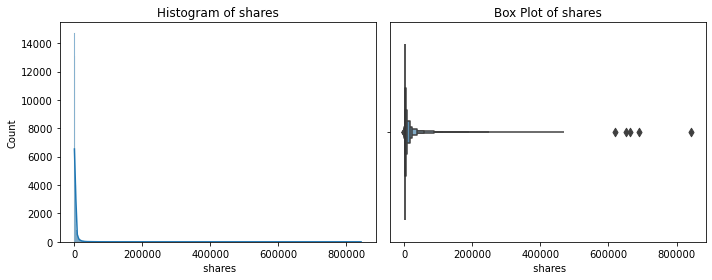

In [12]:
eda_plot(raw_data, target)

The variable has far outlying values on the right, so we re-inspect it with the values that are over 7 standard deviations from the mean omitted; this value is chosen to keep the amount of data lost low. Note that these values have not been removed from the data set for this visualization, but their indices have been added to a drop list (or drop set) in case outliers do need to be removed later.

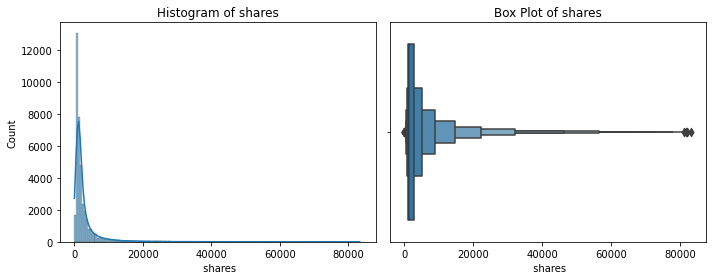

81 outliers omitted.


In [13]:
dropset = set()
dropset = cut_outliers(dropset, raw_data, target)

The result even with outliers omitted is a very right-skewed distribution with a narrow interquartile range.

### Content Numerics

This is the subset of numeric variables regarding article content composition, a mix of discrete and continuous attributes. Where extreme outliers are detected, we add them to the drop set and repeat visualizations without them to get a better view of the variable's core distribution.

In [14]:
active_subset = numerics_content
i = 0

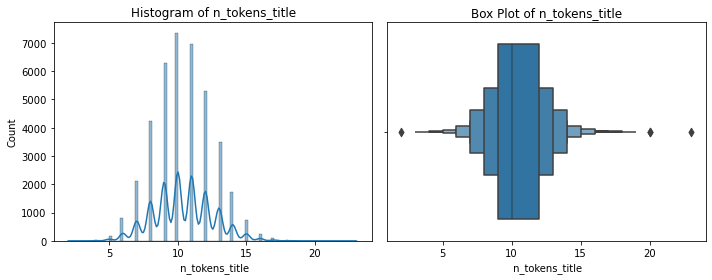

In [15]:
eda_plot(raw_data, active_subset[i])
i += 1

This is a discrete variable with a roughly binomial distribution.

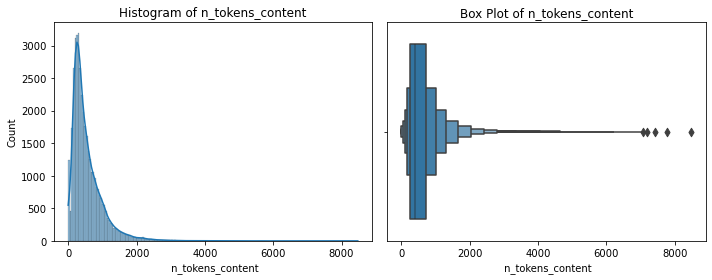

In [16]:
eda_plot(raw_data, active_subset[i])
i += 1

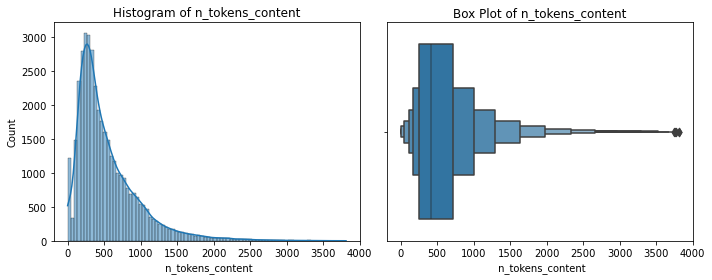

45 outliers omitted.


In [17]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

Another right-skewed attribute.

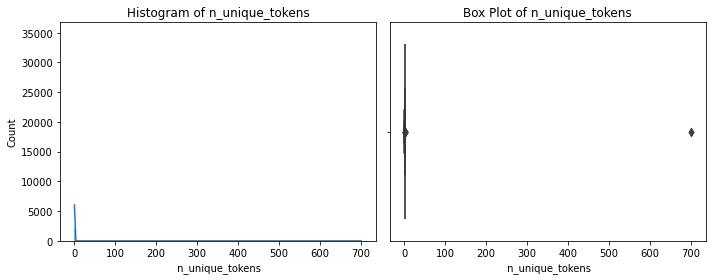

In [18]:
eda_plot(raw_data, active_subset[i])
i += 1

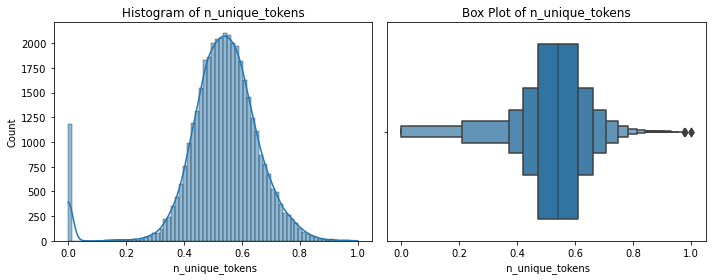

1 outliers omitted.


In [19]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

Removing a lone outlier shows us an essentially normal distribution, but with a non-negligible and likely valid set of articles with 0 unique tokens on the left.

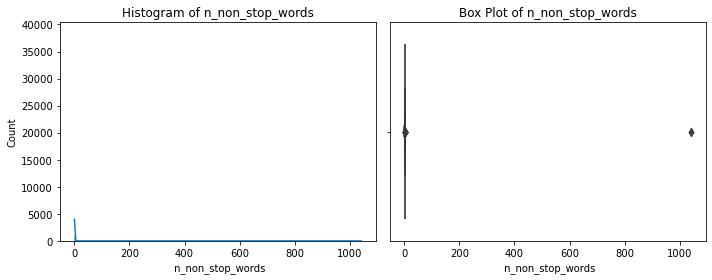

In [20]:
eda_plot(raw_data, active_subset[i])
i += 1

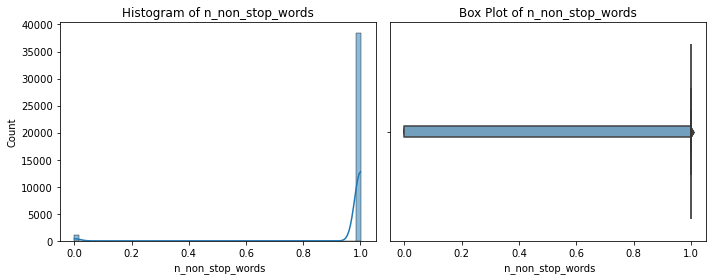

1 outliers omitted.


In [21]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

This variable has so little variation that it is practically useless for predictive modeling.

In [22]:
useless = set()
useless.add(active_subset[i-1])

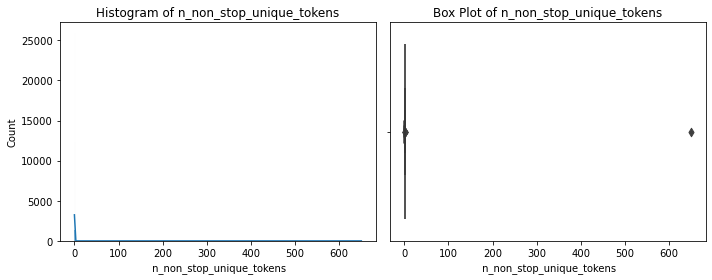

In [23]:
eda_plot(raw_data, active_subset[i])
i += 1

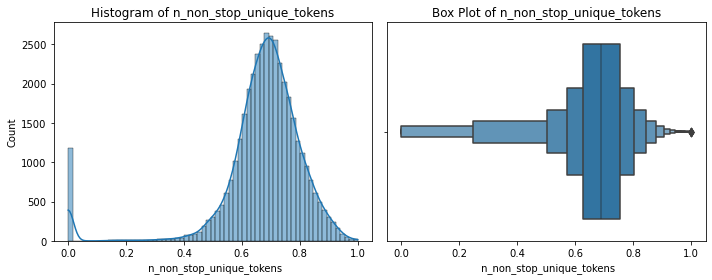

1 outliers omitted.


In [24]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

_n non stop unique tokens_ and _n unique tokens_ have _very_ similar distributions.

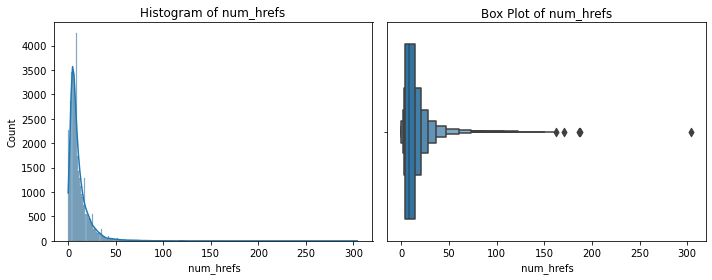

In [25]:
eda_plot(raw_data, active_subset[i])
i += 1

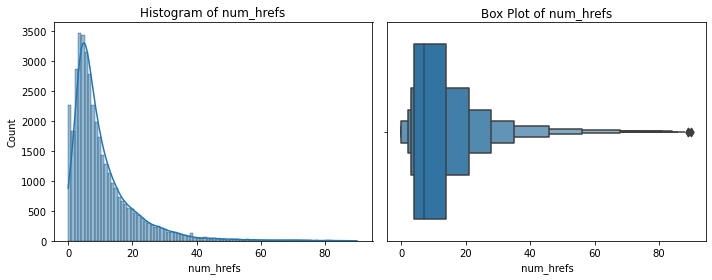

71 outliers omitted.


In [26]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

Another right-skewed distribution similar to _n_tokens_content_.

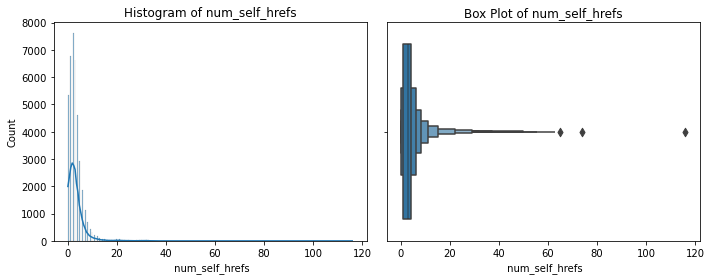

In [27]:
eda_plot(raw_data, active_subset[i])
i += 1

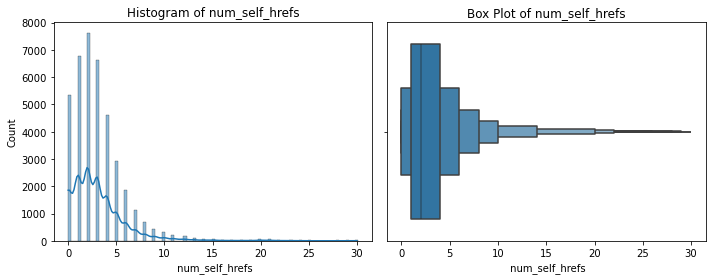

131 outliers omitted.


In [28]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

A right-skewed discrete variable a few extreme outliers.

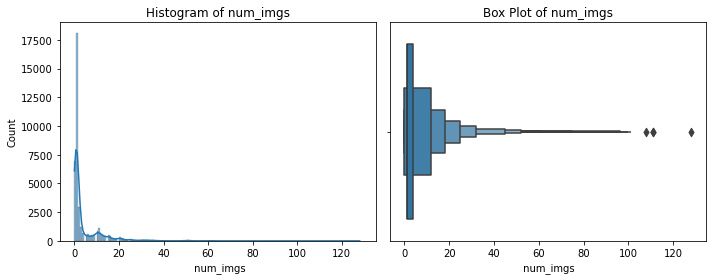

In [29]:
eda_plot(raw_data, active_subset[i])
i += 1

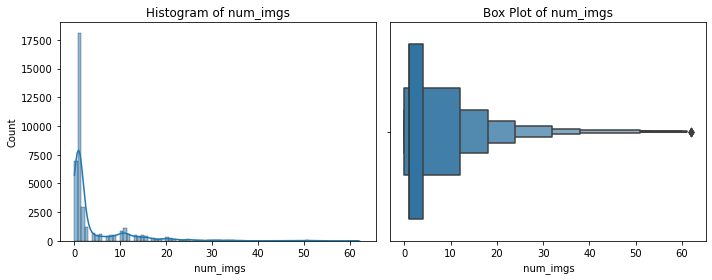

70 outliers omitted.


In [30]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

_num imgs_ has a very narrow interquartile range since most articles only contain a handful of images.

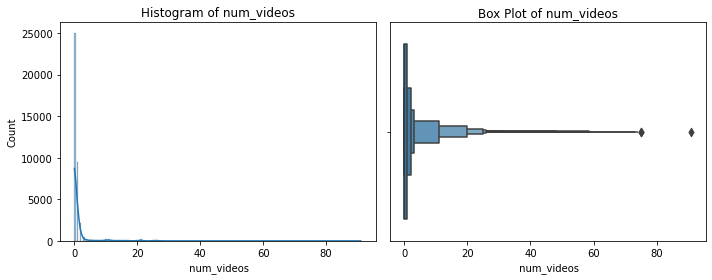

In [31]:
eda_plot(raw_data, active_subset[i])
i += 1

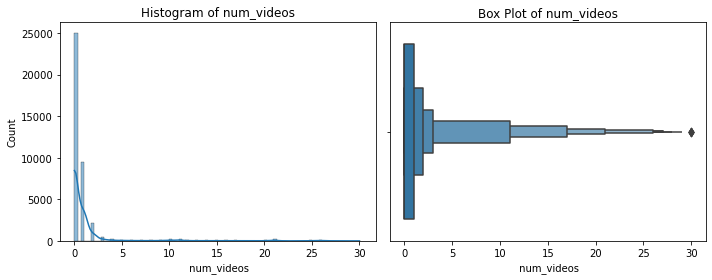

89 outliers omitted.


In [32]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

Again we see most articles contain only a very small number of videos. The right tail is not as extreme as the counterpart distribution for images.

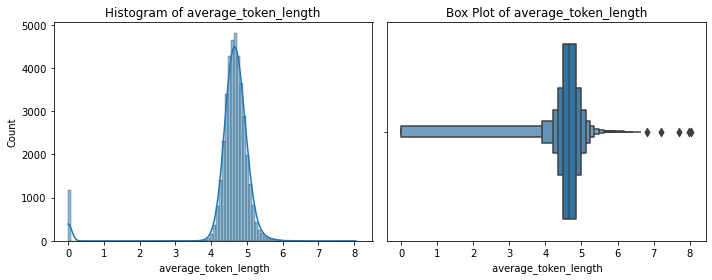

In [33]:
eda_plot(raw_data, active_subset[i])
i += 1

Another normal distribution with over a thousand 0-count entries added on.

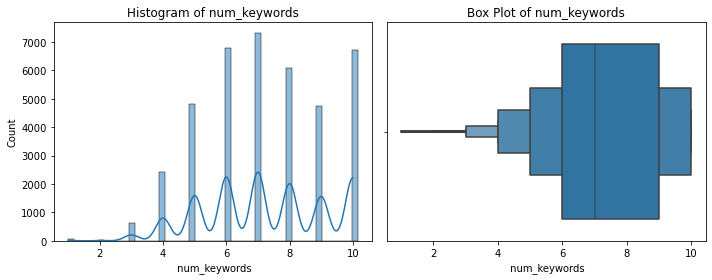

In [34]:
eda_plot(raw_data, active_subset[i])
i += 1

A discrete slightly left-skewed attribute.

## Categorical Data

In [72]:
day_shared_col = pd.DataFrame(raw_data[day_of_publish].idxmax(axis=1))
day_shared_col.columns = ['day_shared']

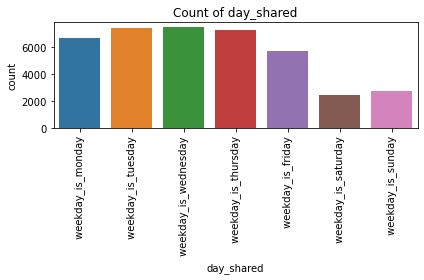

In [76]:
eda_cat_plot(day_shared_col, 'day_shared')

#### Subset Summary

In [35]:
print('Rolling total outlier count: ' + str(len(dropset)))

Rolling total outlier count: 456


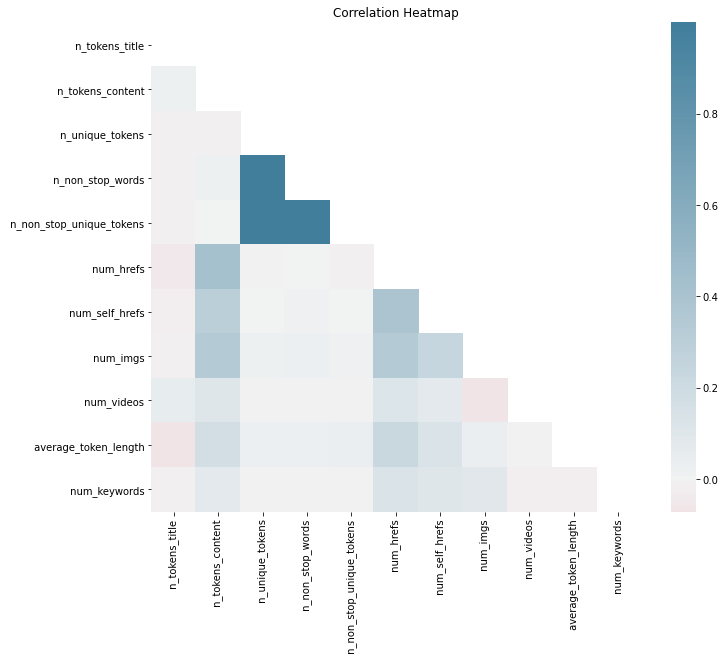

In [37]:
corr = raw_data[active_subset].corr()

mask = np.triu(np.ones_like(corr, dtype = bool))
fig, axes = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(0, 230, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square = True)
plt.title('Correlation Heatmap')
plt.show()

Within the content subset, 3 variables are very highly positively correlated - _n unique tokens_, _n non stop words_ and _n non stop unique tokens_. This is an intuitive correlation since they are measures of very similar things - unique tokens are likely to not be stop words, which are ubiquitous and rarely unique within a single article. We will consider using only one of these variables for predictive modeling - though since _n non stop words_ had extremely low variation, it is not likely to be this one.

### Keyword Numerics

These are numeric attributes describing the relation of shares to keywords.

In [33]:
active_subset = numerics_keywords
i = 0

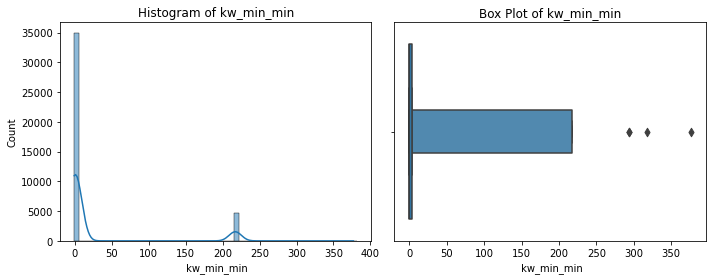

In [34]:
eda_plot(raw_data, active_subset[i])
i += 1

The vast majority of values here are 0, but a second spike of 5000 valid entries with values just above 200 also exist.

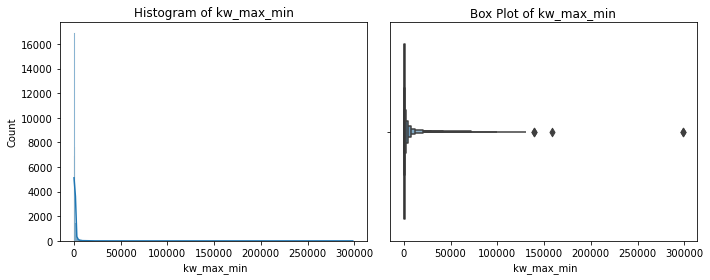

In [35]:
eda_plot(raw_data, active_subset[i])
i += 1

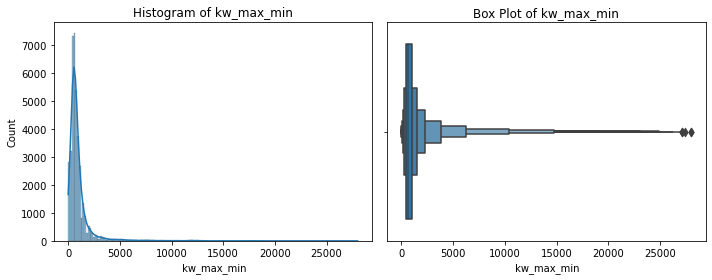

84 outliers omitted.


In [36]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

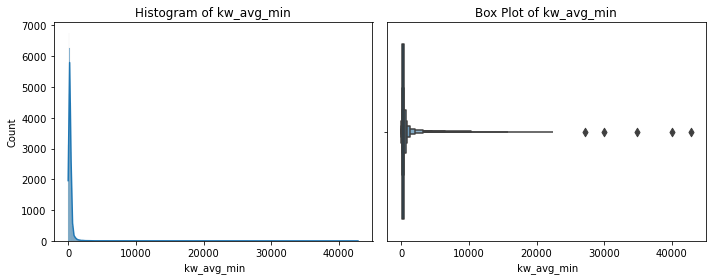

In [37]:
eda_plot(raw_data, active_subset[i])
i += 1

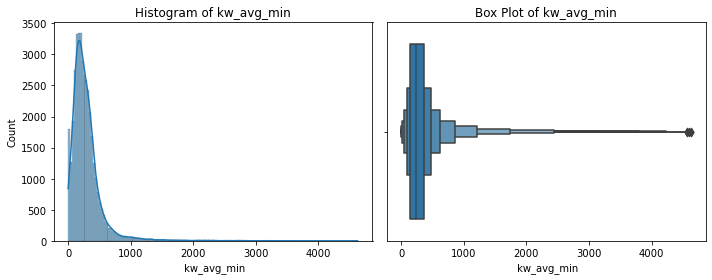

74 outliers omitted.


In [38]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

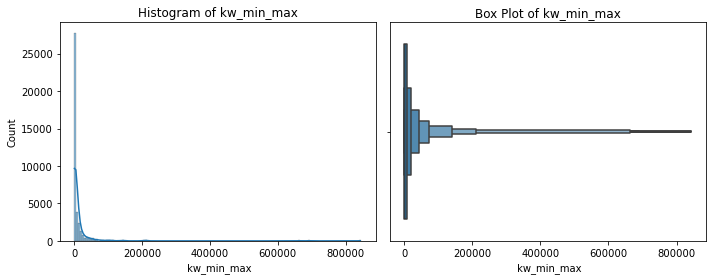

In [39]:
eda_plot(raw_data, active_subset[i])
i += 1

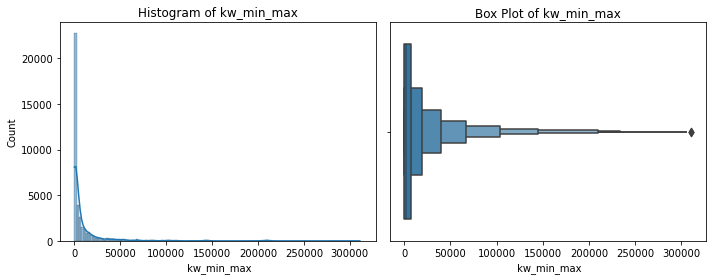

225 outliers omitted.


In [40]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

Many highly right-skewed attributes exist in this subset.

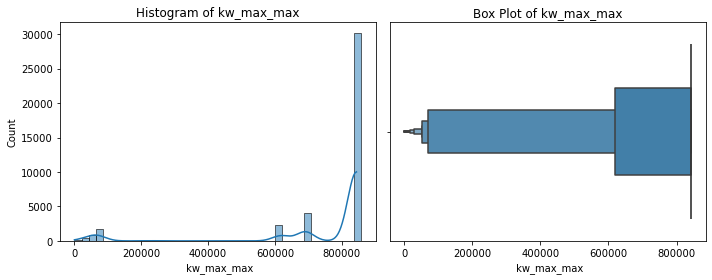

In [41]:
eda_plot(raw_data, active_subset[i])
i += 1

_kw max max_ has the vast majority of its values above 800000 with only small concentrations at lower values.

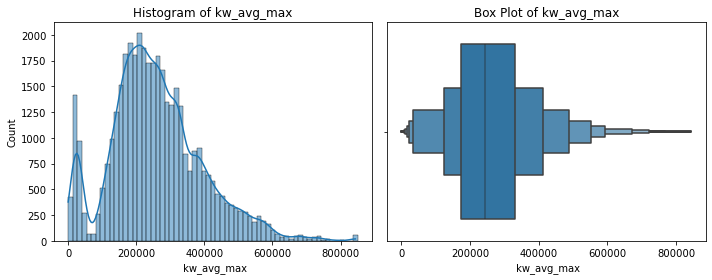

In [42]:
eda_plot(raw_data, active_subset[i])
i += 1

A bimodal distribution.

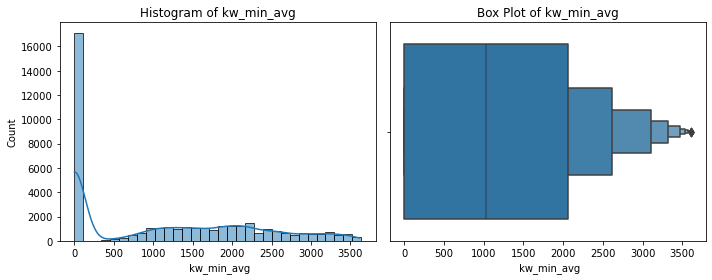

In [43]:
eda_plot(raw_data, active_subset[i])
i += 1

Another central distribution attached to a large mass of zero entries, except in this case the zero entries dominate over the positively distributed ones in count.

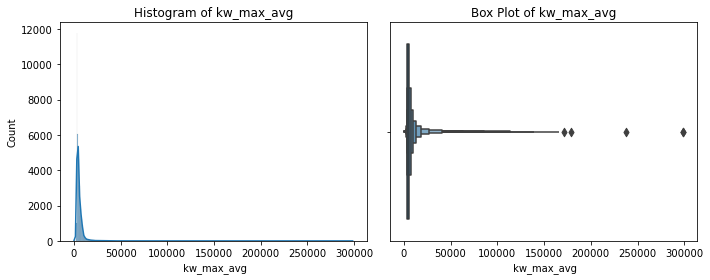

In [44]:
eda_plot(raw_data, active_subset[i])
i += 1

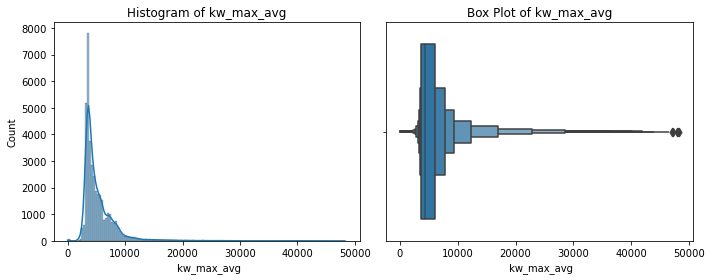

126 outliers omitted.


In [45]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

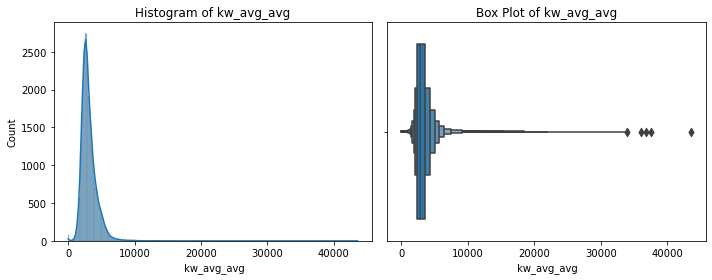

In [46]:
eda_plot(raw_data, active_subset[i])
i += 1

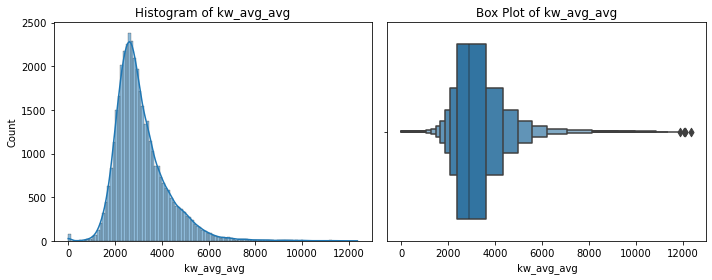

75 outliers omitted.


In [47]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

This attribute becomes far more normal-like after outliers are removed, but is still noticeably right-skewed.

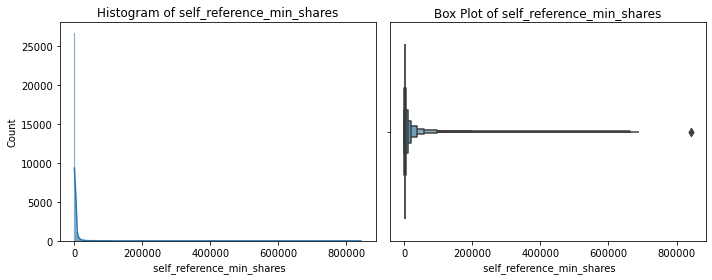

In [48]:
eda_plot(raw_data, active_subset[i])
i += 1

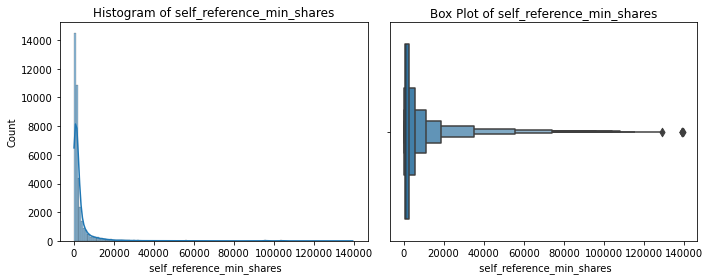

52 outliers omitted.


In [49]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

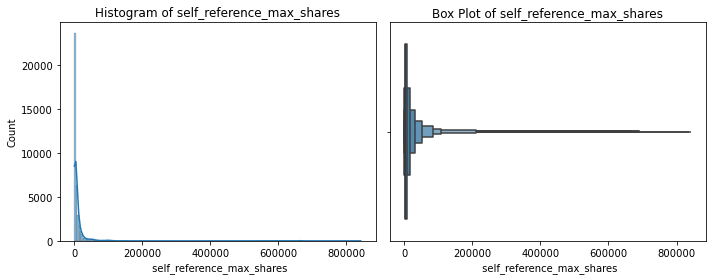

In [50]:
eda_plot(raw_data, active_subset[i])
i += 1

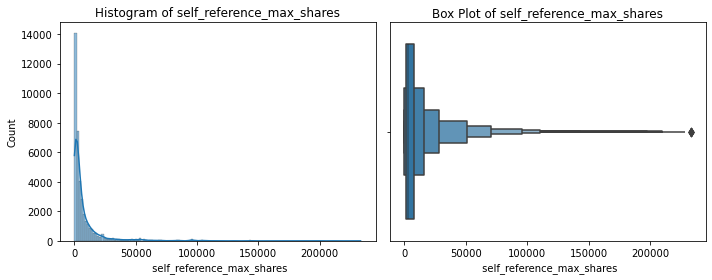

141 outliers omitted.


In [51]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

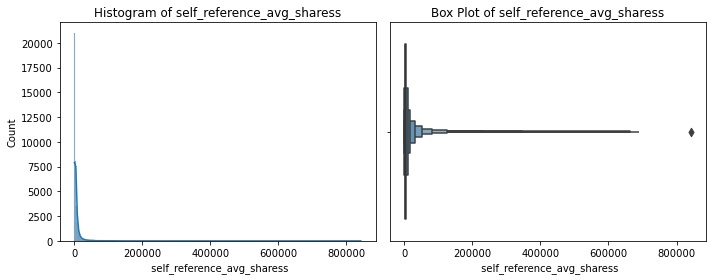

In [52]:
eda_plot(raw_data, active_subset[i])
i += 1

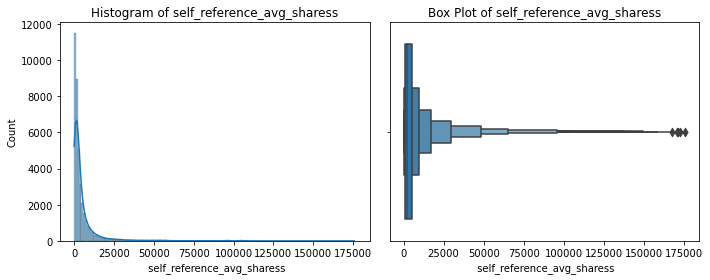

103 outliers omitted.


In [53]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

The self reference attributes all have similar narrow interquartile ranges and high right skewss.

#### Subset Summary

In [54]:
print('Rolling total outlier count: ' + str(len(dropset)))

Rolling total outlier count: 989


<AxesSubplot:>

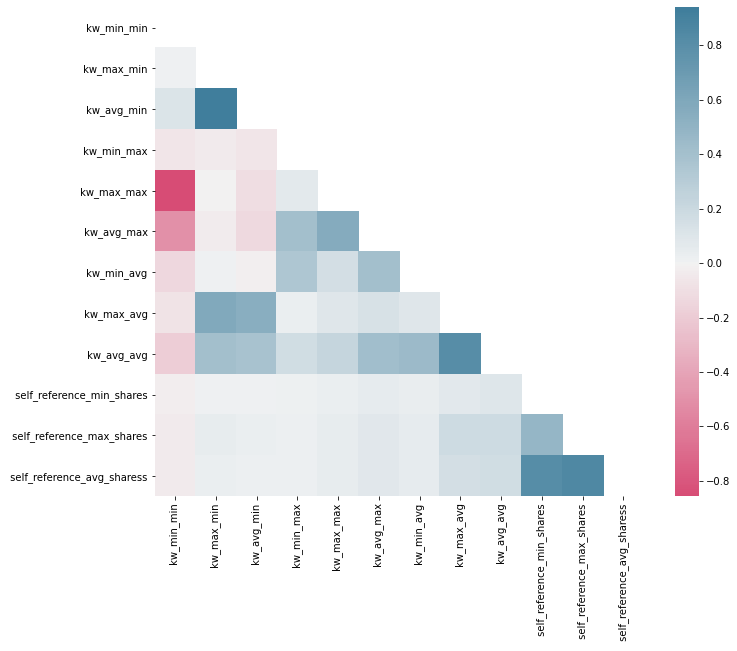

In [55]:
corr = raw_data[active_subset].corr()

mask = np.triu(np.ones_like(corr, dtype = bool))
fig, axes = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(0, 230, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square = True)
plt.show()

From this subset, the standout bivariate correlations are between _kw avg min_ and _kw max min_ (positive) and _kw max max_ and _kw min min_ (negative). We will consider keeping only one of each of these pairs for modeling.

### Sentiment Numerics

This final subset of numeric values largely pertain to sentiment analyses of the articles in our data set. They are largely continuous values though many of them are strongly bounded between 0 and 1.

In [56]:
active_subset = numerics_sentiment
i = 0

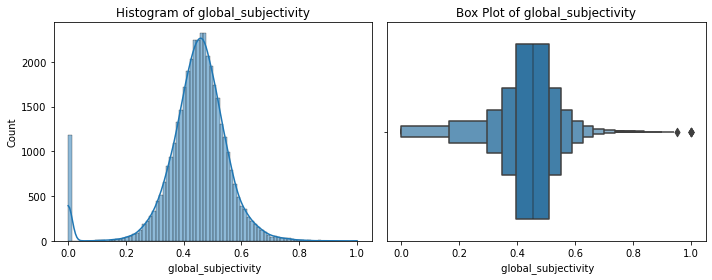

In [57]:
eda_plot(raw_data, active_subset[i])
i += 1

A normal distribution attached to a zero valued spike where perhaps a subjectivity score has not been recorded.

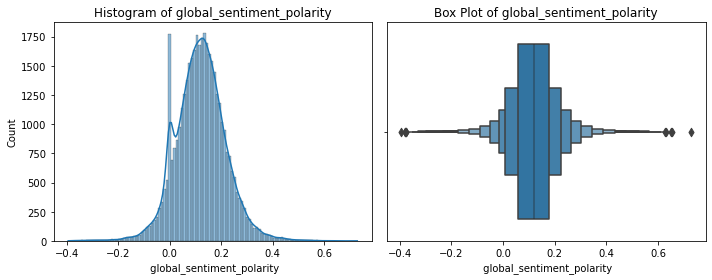

In [58]:
eda_plot(raw_data, active_subset[i])
i += 1

Noteworthy here is that the zero valued spike actually falls _within_ the normal distribution.

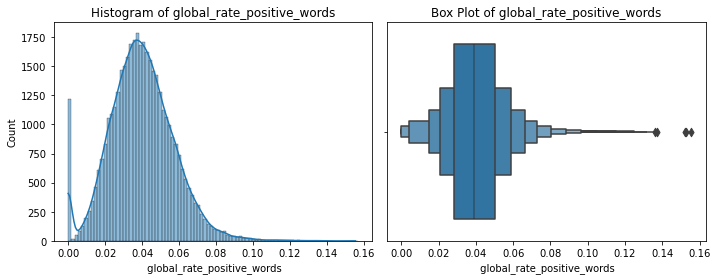

In [59]:
eda_plot(raw_data, active_subset[i])
i += 1

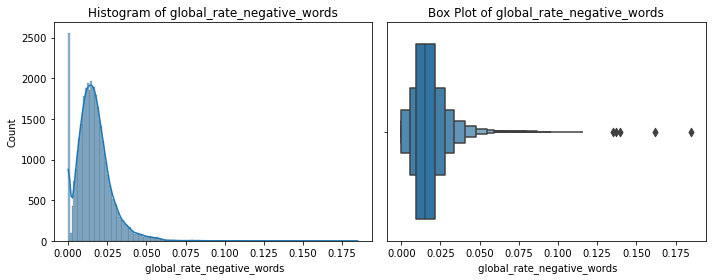

In [60]:
eda_plot(raw_data, active_subset[i])
i += 1

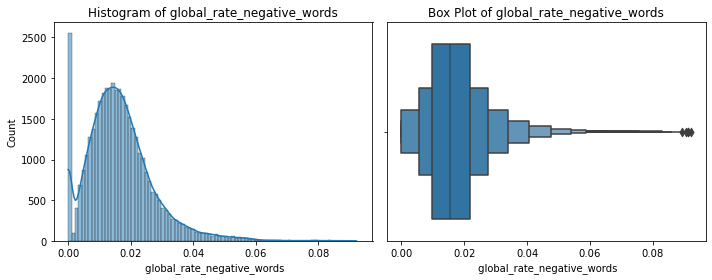

12 outliers omitted.


In [61]:
dropset = cut_outliers(dropset, raw_data, active_subset[i-1])

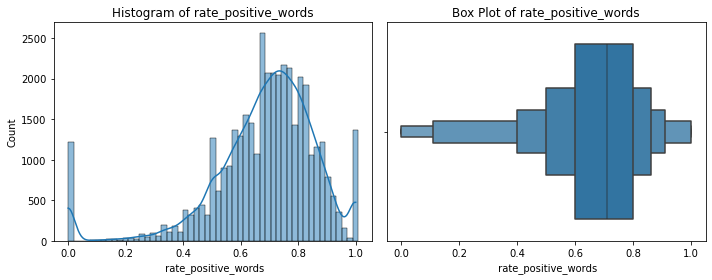

In [62]:
eda_plot(raw_data, active_subset[i])
i += 1

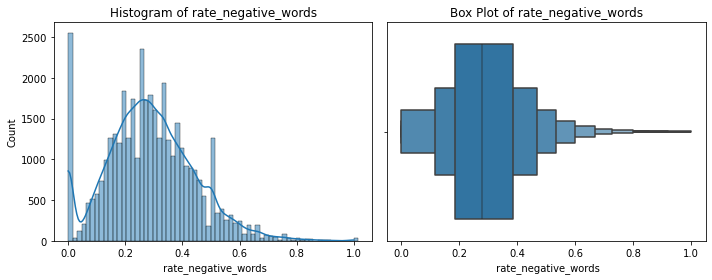

In [63]:
eda_plot(raw_data, active_subset[i])
i += 1

The rate attributes are by definition bounded between 0 and 1 (none and all).

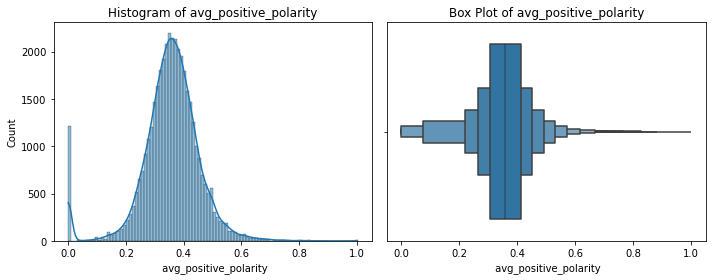

In [64]:
eda_plot(raw_data, active_subset[i])
i += 1

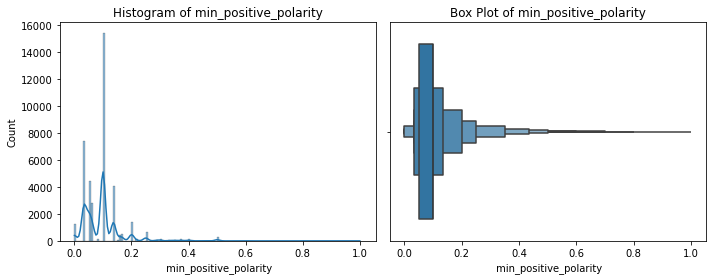

In [65]:
eda_plot(raw_data, active_subset[i])
i += 1

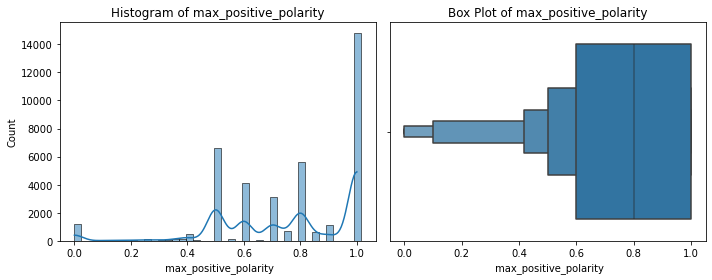

In [66]:
eda_plot(raw_data, active_subset[i])
i += 1

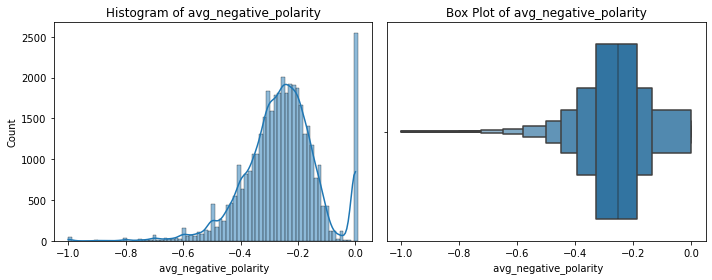

In [67]:
eda_plot(raw_data, active_subset[i])
i += 1

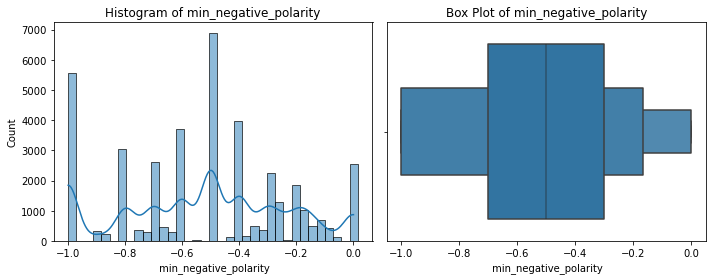

In [68]:
eda_plot(raw_data, active_subset[i])
i += 1

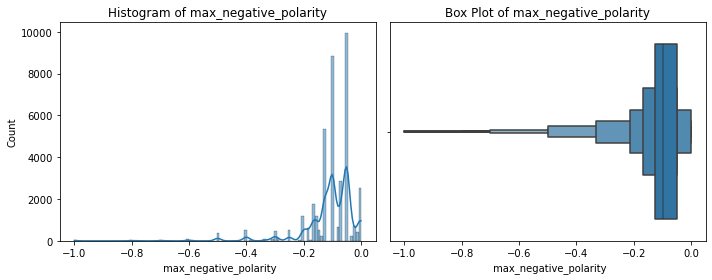

In [69]:
eda_plot(raw_data, active_subset[i])
i += 1

Positive polarities vary between 0 and 1 while negative polarities vary between -1 and 0.

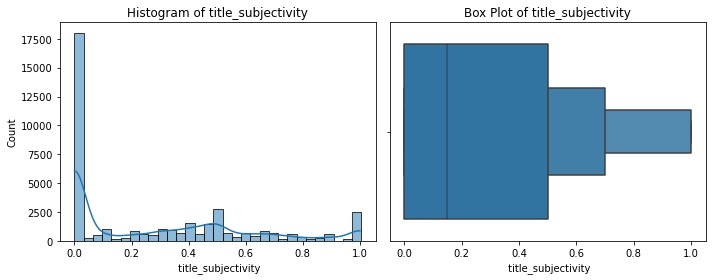

In [70]:
eda_plot(raw_data, active_subset[i])
i += 1

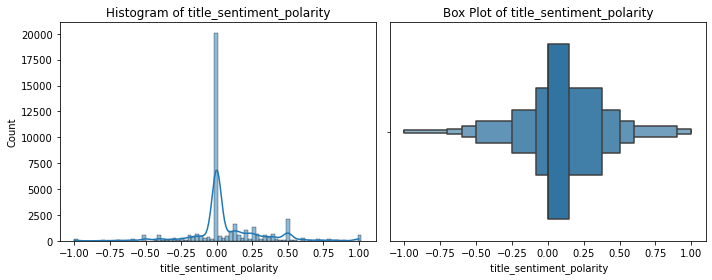

In [71]:
eda_plot(raw_data, active_subset[i])
i += 1

Title sentiment polarity spans the entire polarity spectrum from -1 to 1, though as with many attributes in this subset the vast majority of values are 0.

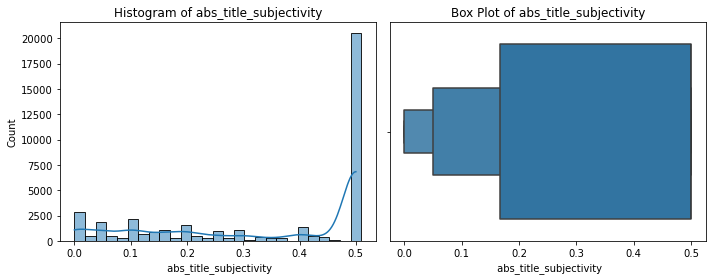

In [72]:
eda_plot(raw_data, active_subset[i])
i += 1

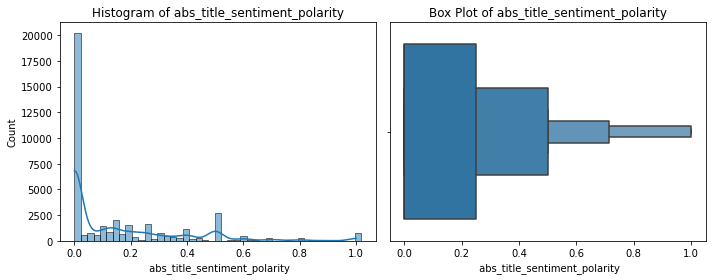

In [73]:
eda_plot(raw_data, active_subset[i])
i += 1

#### Subset Summary

In [74]:
print('Rolling total outlier count: ' + str(len(dropset)))

Rolling total outlier count: 1001


<AxesSubplot:>

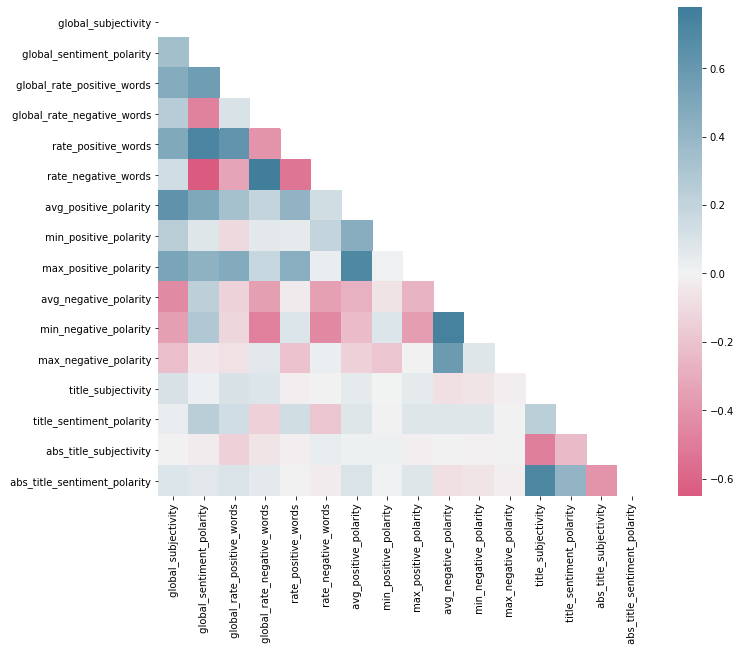

In [75]:
corr = raw_data[active_subset].corr()

mask = np.triu(np.ones_like(corr, dtype = bool))
fig, axes = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(0, 230, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square = True)

In this subset even the highest correlations are below 0.8 in absolute value, so we cannot declare the existence of bivariate collinearity here.

### Complete Correlation Matrix

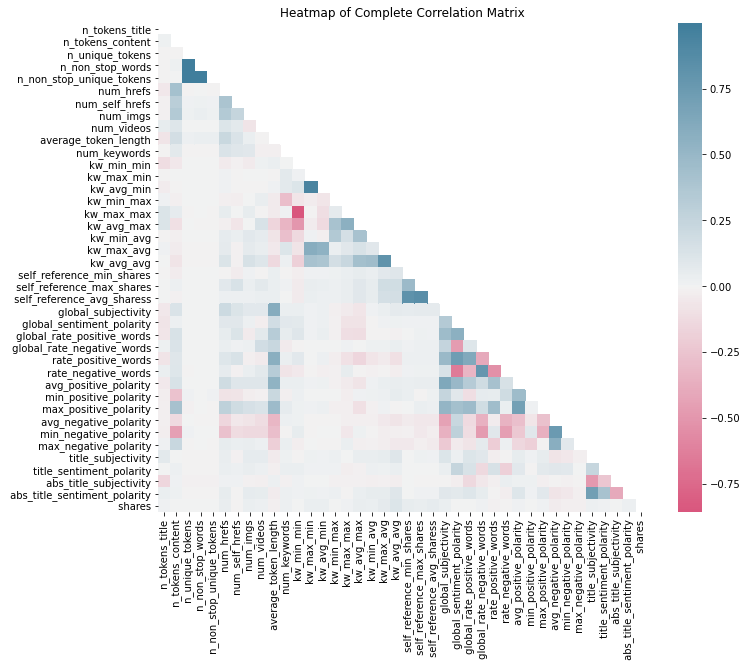

In [40]:
corr = raw_data[numerics_content + numerics_keywords + numerics_sentiment + [target]].corr()

mask = np.triu(np.ones_like(corr, dtype = bool))
fig, axes = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(0, 230, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square = True)
plt.title('Heatmap of Complete Correlation Matrix')
plt.show()

We see that our response variable is not correlated to any of our predictors, and there are no new bivariate correlations of note that we did not spot in the earlier subsets.

We declare the collinear variables to be only _n non stop words_ and _n non stop unique tokens_ which are both represented by _n unique tokens_, and _kw min min_ which is inversely represented by _kw max max_.

In [79]:
useless.add(' n_non_stop_words')
useless.add(' n_non_stop_unique_tokens')
useless.add(' kw_min_min')
useless

{' kw_min_min', ' n_non_stop_unique_tokens', ' n_non_stop_words'}

## Categorical Variables

In [ ]:
## do stuff here

commentary

# Feature Selection & Model Building

#### Post-EDA Transform

First we conduct some basic transformation and filtering informed by our EDA work. This involves the removal of outliers* and the removal of the 3 attributes with apparent bivariate collinearity and/or low variance issues.

\*(outliers are not numerous enough to justify a full re-analysis, especially considering that a lot of the necessary visualization was previewed in the original EDA)

In [80]:
raw_data.shape

(39644, 61)

In [82]:
transformed_data = raw_data.drop(dropset, axis = 0).drop(useless, axis = 1)

transformed_data.shape

(38643, 58)

## Principal Component Analysis

The next step ...

In [87]:
numeric_predictors = numerics_content + numerics_keywords + numerics_sentiment
for i in useless:
    numeric_predictors.remove(i)

numeric_data = transformed_data[numeric_predictors]
numeric_data.shape

(38643, 36)

In [ ]:
## do stuff here

commentary

## Model Building

backwards selection

In [ ]:
## I will do this

# Model Evaluation

cross validation, holdout data, etc.

In [ ]:
## I will do this

commentary

# Conclusion

In conclusion, we have done things.